# Analyse der RPG-Games Daten

In [1]:
# Import
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('RPG_Games_Data.csv', index_col=0).drop_duplicates()
print(df.shape)
df.head(2)

/home/jm/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(178656, 21)


,appid,average_2weeks,average_forever,ccu,developer,median_2weeks,median_forever,name,negative,owners,...,players_2weeks,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,tags,userscore
date,,,,,,,,,,,,,,,,,,,,,
2017-11-01,102500.0,190.0,1553.0,453.0,"Big Huge Games, 38 Studios",122.0,556.0,Kingdoms of Amalur: Reckoning,NaN,990373.0,...,13573.0,3485.0,823049.0,27120.0,NaN,499.0,"38 Studios, Electronic Arts",65.0,"{'Controller': 66, 'Action': 348, 'Adventure':...",NaN
2017-11-01,10270.0,216.0,3102.0,70.0,Akella,177.0,535.0,Disciples III: Reincarnation,NaN,107415.0,...,1638.0,1210.0,62249.0,7464.0,NaN,299.0,bitComposer Games,28.0,"{'Gothic': 15, 'RPG': 130, 'Fantasy': 52, 'Sin...",NaN


# Gruppieren nach den Games

In [3]:
agg_dict = {}
for column in df.columns:
    if column in ['tags']:
        continue
    agg_dict[column] = 'mean'
agg_dict['name'] = 'max'
agg_dict['developer'] = lambda x:x.value_counts().index
agg_dict['publisher'] = lambda x:x.value_counts().index

df_games = df.groupby('appid').agg(agg_dict).set_index('name')
df_games['pos_neg_ratio'] = df_games['positive'] / df_games['negative']
df_games.head(2)

,appid,average_2weeks,average_forever,ccu,developer,median_2weeks,median_forever,negative,owners,owners_variance,players_2weeks,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,userscore,pos_neg_ratio
name,,,,,,,,,,,,,,,,,,,,
Arx Fatalis,1700.0,60.361963,207.355828,4.464286,Arkane Studios,82.631902,18.693252,73.964029,1.493564e+05,12059.595092,1328.300613,1396.024540,70238.742331,8268.865031,535.827338,446.085890,Arkane Studios,65.711656,87.035971,7.244431
Two Worlds Epic Edition,1930.0,330.312883,375.085890,461.821429,Reality Pump Studios,362.110429,192.558282,967.086331,1.083717e+06,32477.245399,15852.932515,3823.453988,539010.190184,22910.355828,2271.964029,829.368098,Topware Interactive,27.907975,70.000000,2.349288


# Welche Games haben die meisten positiven und negativen Reviews?

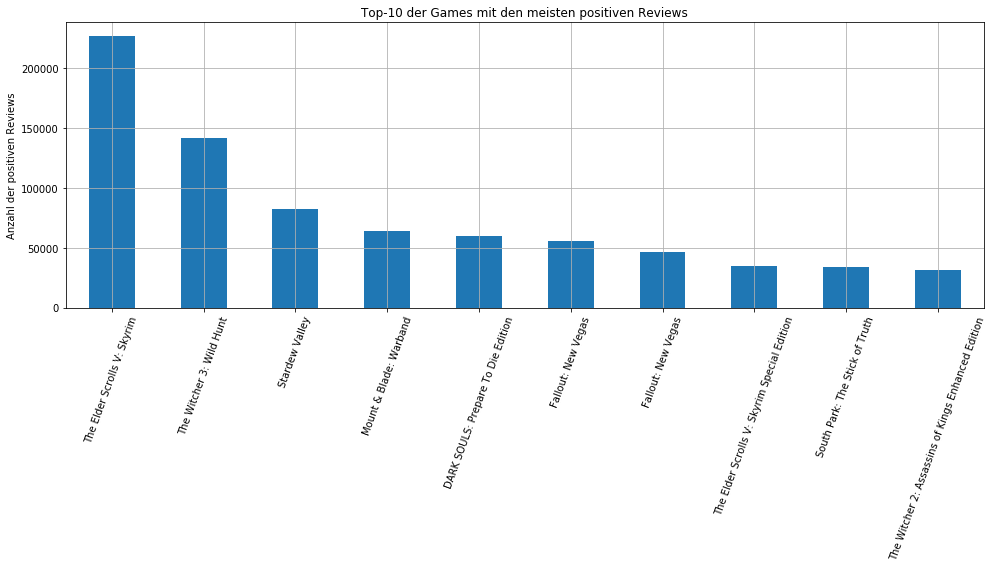

In [4]:
n = 10
df_plot = df_games['positive'].sort_values(ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} der Games mit den meisten positiven Reviews'.format(n), figsize=(14,8), grid=True)
plt.xlabel('')
plt.ylabel('Anzahl der positiven Reviews')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/03_Games_mit_den_meisten_positiven_Reviews.pdf')

df_plot.head(100).to_csv('Tabellen/03_Games_mit_den_meisten_positiven_Reviews.csv')

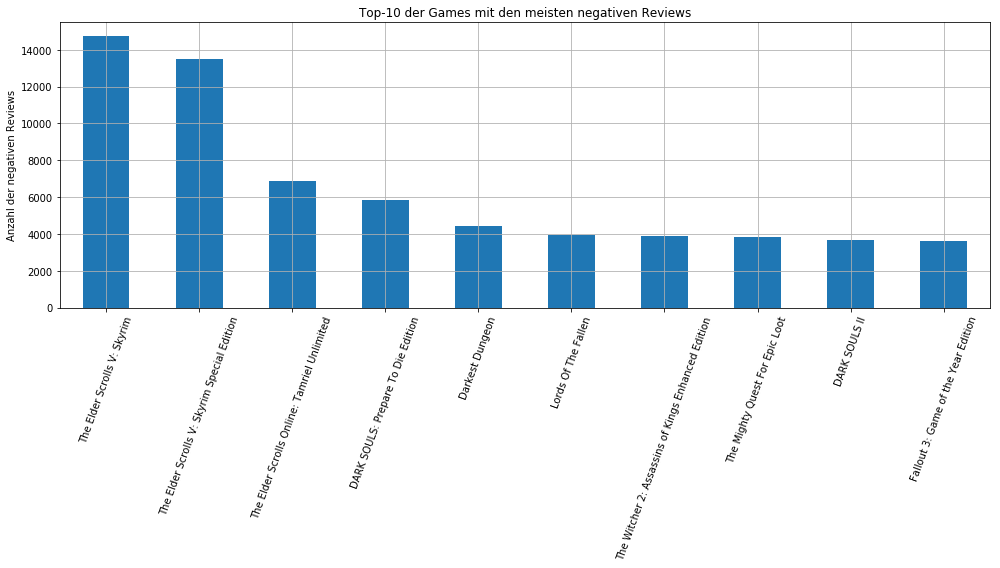

In [5]:
n = 10
df_plot = df_games['negative'].sort_values(ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} der Games mit den meisten negativen Reviews'.format(n), figsize=(14,8), grid=True)
plt.xlabel('')
plt.ylabel('Anzahl der negativen Reviews')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/04_Games_mit_den_meisten_negativen_Reviews.pdf')

df_plot.head(100).to_csv('Tabellen/04_Games_mit_den_meisten_negativen_Reviews.csv')

# Positive & negative Reviews im Verhältnis zueinander

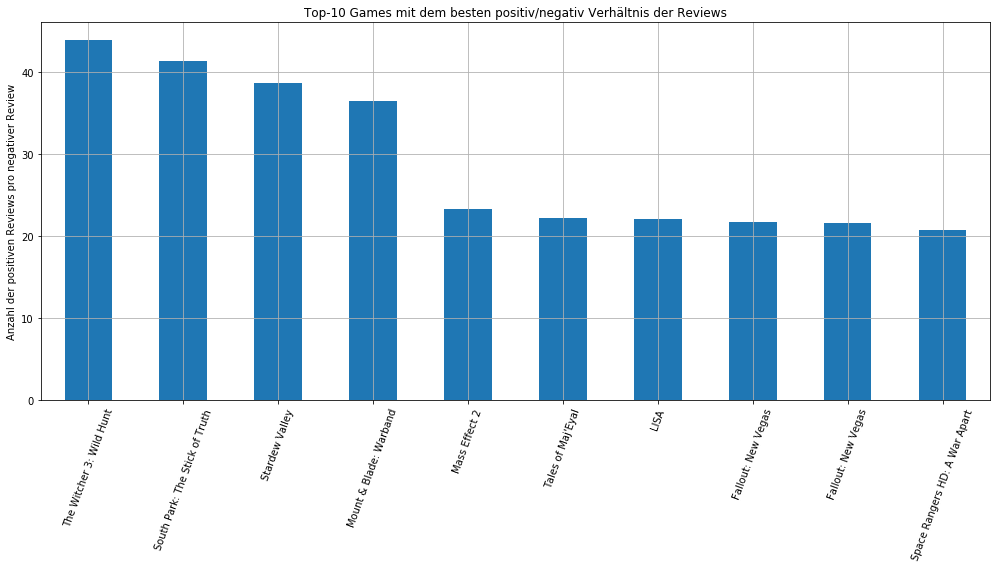

In [6]:
n, m = 10, 100
df_plot = df_games[(df_games['positive']>m) & (df_games['negative']>m)]['pos_neg_ratio'].sort_values(ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} Games mit dem besten positiv/negativ Verhältnis der Reviews'.format(n), figsize=(14,8), grid=True)
plt.xlabel('')
plt.ylabel('Anzahl der positiven Reviews pro negativer Review')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/05_Games_mit_dem_besten_positiv_negativ_Verhältnis_der_Reviews.pdf')

df_plot.head(100).to_csv('Tabellen/05_Games_mit_dem_besten_positiv_negativ_Verhältnis_der_Reviews.csv')

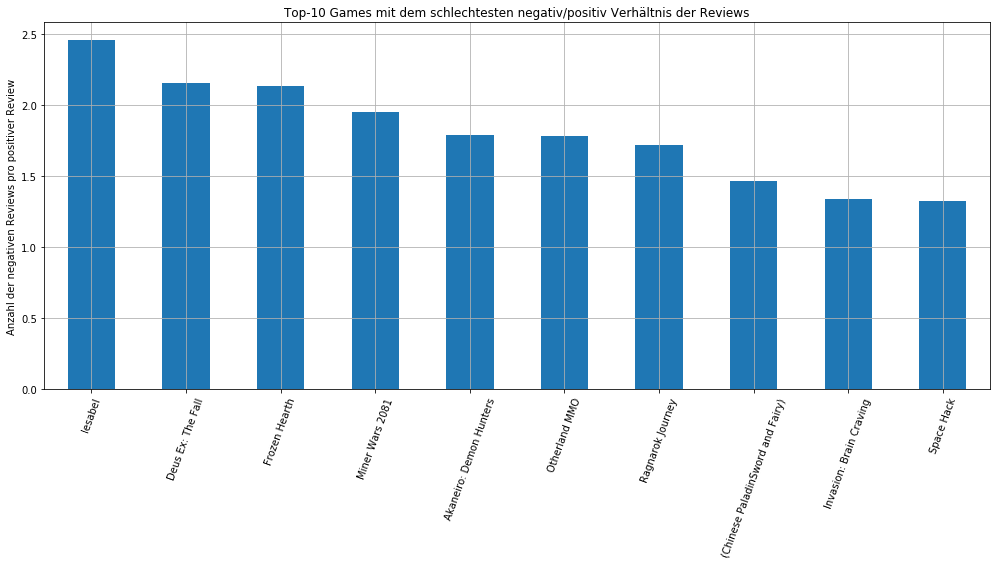

In [7]:
n, m = 10, 100
df_plot = df_games[(df_games['positive']>m) & (df_games['negative']>m)]['pos_neg_ratio'].apply(lambda x: 1/x).sort_values(ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} Games mit dem schlechtesten negativ/positiv Verhältnis der Reviews'.format(n), figsize=(14,8), grid=True)
plt.xlabel('')
plt.ylabel('Anzahl der negativen Reviews pro positiver Review')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/06_Games_mit_dem_schlechtesten_negativ_positiv_Verhältnis_der_Reviews.pdf')

df_plot.head(100).to_csv('Tabellen/06_Games_mit_dem_schlechtesten_negativ_positiv_Verhältnis_der_Reviews.csv')

# Gruppieren nach Developer

In [8]:
df_dev = df.dropna().groupby('name').agg({'developer':lambda x:x.value_counts().index, 'negative':'mean', 'positive':'mean'}).groupby('developer').agg({'developer':'count', 'negative':'sum', 'positive':'sum'}).rename(columns={'developer':'games'})
df_dev['pos_neg_ratio'] = df_dev['positive']/df_dev['negative']
df_dev.head(2)

,games,negative,positive,pos_neg_ratio
developer,,,,
10x10 Room,1,7.0,25.00,3.571429
1C Company,5,164.5,1381.25,8.396657


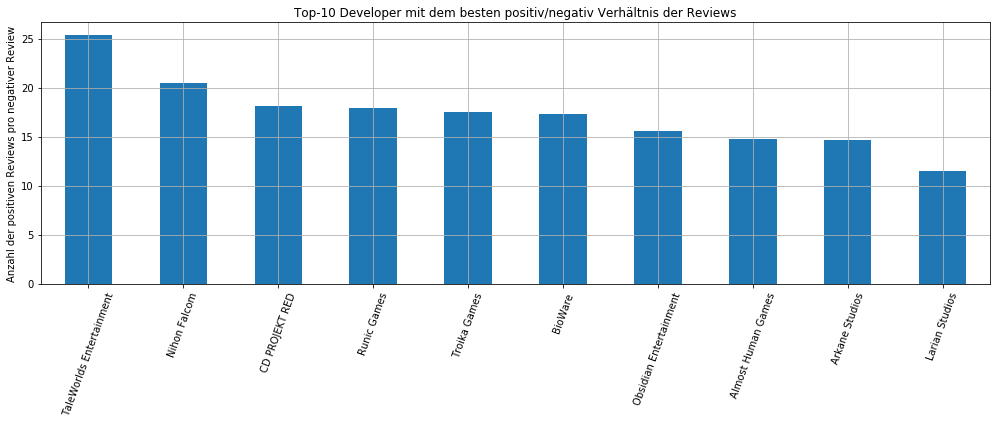

In [9]:
m, n, o = 100, 10, 1
df_plot = df_dev[(df_dev['games']>o) & (df_dev['positive']>m) & (df_dev['negative']>m)]['pos_neg_ratio'].sort_values(ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} Developer mit dem besten positiv/negativ Verhältnis der Reviews'.format(n), figsize=(14,6), grid=True)
plt.xlabel('')
plt.ylabel('Anzahl der positiven Reviews pro negativer Review')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/07_Developer_mit_dem_besten_positiv_negativ_Verhältnis_der_Reviews.pdf')

df_plot.head(30).to_csv('Tabellen/07_Developer_mit_dem_besten_positiv_negativ_Verhältnis_der_Reviews.csv')

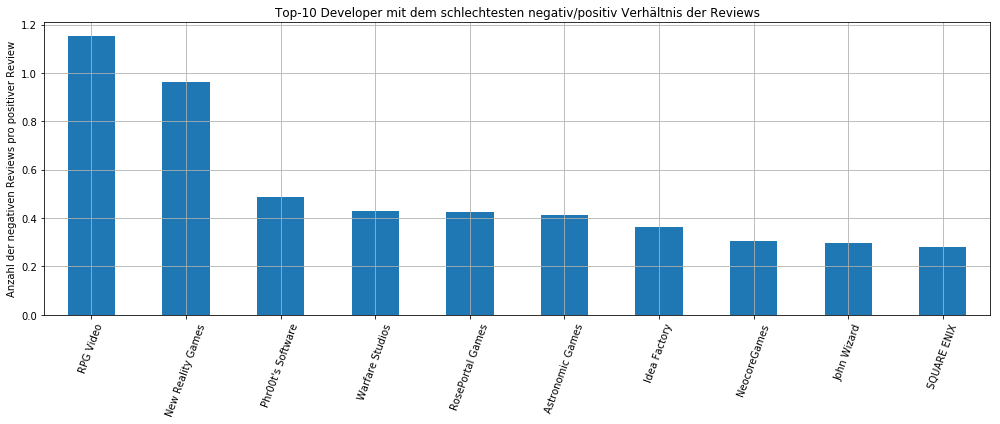

In [10]:
m, n, o = 100, 10, 3
df_plot = df_dev[(df_dev['games']>o) & (df_dev['positive']>m) & (df_dev['negative']>m)]['pos_neg_ratio'].apply(lambda x: 1/x).sort_values(ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} Developer mit dem schlechtesten negativ/positiv Verhältnis der Reviews'.format(n), figsize=(14,6), grid=True)
plt.xlabel('')
plt.ylabel('Anzahl der negativen Reviews pro positiver Review')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/08_Developer_mit_dem_schlechtesten_negativ_positiv_Verhältnis_der_Reviews.pdf')

df_plot.head(30).to_csv('Tabellen/08_Developer_mit_dem_schlechtesten_negativ_positiv_Verhältnis_der_Reviews.csv')

# Group by Publisher

In [11]:
df_dev = df.dropna().groupby('name').agg({'publisher':lambda x:x.value_counts().index, 'negative':'mean', 'positive':'mean'}).groupby('publisher').agg({'publisher':'count', 'negative':'sum', 'positive':'sum'}).rename(columns={'publisher':'games'})
df_dev['pos_neg_ratio'] = df_dev['positive']/df_dev['negative']
df_dev.head(2)

,games,negative,positive,pos_neg_ratio
publisher,,,,
"GungHo Online Entertainment America, Inc.\t",1,77.75,916.25,11.784566
SOFTSTAR TECHNOLOGY BEIJINGCOLTD,1,246.50,158.00,0.640974


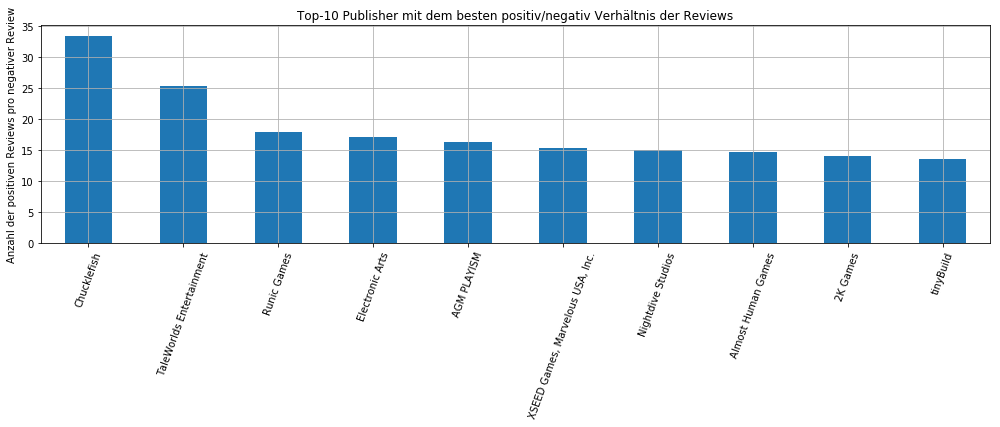

In [12]:
m, n, o = 100, 10, 1
df_plot = df_dev[(df_dev['games']>o) & (df_dev['positive']>m) & (df_dev['negative']>m)]['pos_neg_ratio'].sort_values(ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} Publisher mit dem besten positiv/negativ Verhältnis der Reviews'.format(n), figsize=(14,6), grid=True)
plt.xlabel('')
plt.ylabel('Anzahl der positiven Reviews pro negativer Review')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/09_Publisher_mit_dem_besten_positiv_negativ_Verhältnis_der_Reviews.pdf')

df_plot.head(30).to_csv('Tabellen/09_Publisher_mit_dem_besten_positiv_negativ_Verhältnis_der_Reviews.csv')

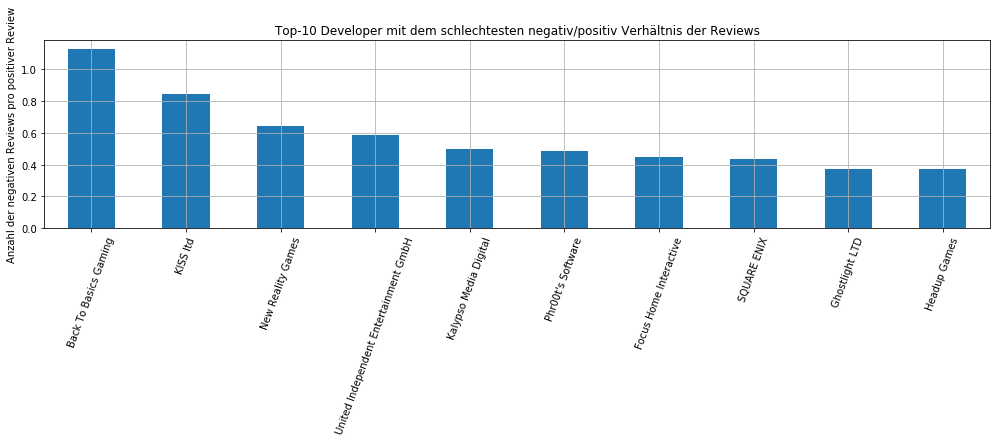

In [13]:
m, n, o = 100, 10, 3
df_plot = df_dev[(df_dev['games']>o) & (df_dev['positive']>m) & (df_dev['negative']>m)]['pos_neg_ratio'].apply(lambda x: 1/x).sort_values(ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} Developer mit dem schlechtesten negativ/positiv Verhältnis der Reviews'.format(n), figsize=(14,6), grid=True)
plt.xlabel('')
plt.ylabel('Anzahl der negativen Reviews pro positiver Review')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/10_Publisher_mit_dem_schlechtesten_negativ_positiv_Verhältnis_der_Reviews.pdf')

df_plot.head(30).to_csv('Tabellen/10_Publisher_mit_dem_schlechtesten_negativ_positiv_Verhältnis_der_Reviews.csv')

# Group by Developer and compute Players_2Weeks

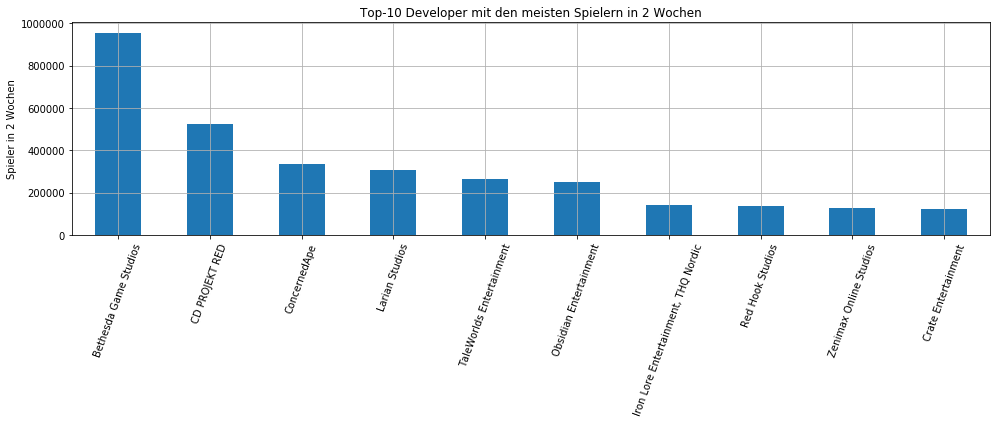

In [14]:
n = 10
df_plot = df.dropna().groupby('name').agg({'developer':'max', 'players_2weeks':'mean'}).groupby('developer').agg('sum').sort_values('players_2weeks', ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} Developer mit den meisten Spielern in 2 Wochen'.format(n), figsize=(14,6), legend=False, grid=True)
plt.xlabel('')
plt.ylabel('Spieler in 2 Wochen')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/11_Developer_mit_den_meisten_Spieler_in_2_Wochen.pdf')

df_plot.head(30).to_csv('Tabellen/11_Developer_mit_den_meisten_Spieler_in_2_Wochen.csv')

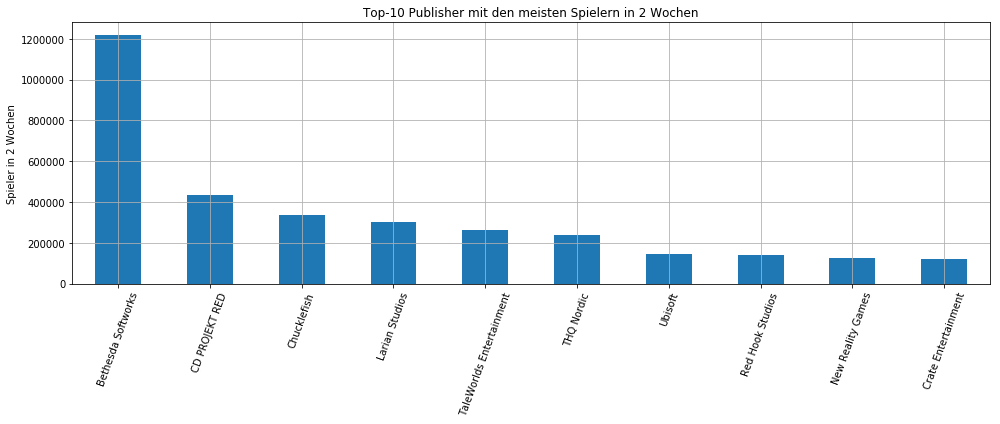

In [15]:
n = 10
df_plot = df.dropna().groupby('name').agg({'publisher':'max', 'players_2weeks':'mean'}).groupby('publisher').agg('sum').sort_values('players_2weeks', ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} Publisher mit den meisten Spielern in 2 Wochen'.format(n), figsize=(14,6), legend=False, grid=True)
plt.xlabel('')
plt.ylabel('Spieler in 2 Wochen')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/12_Publisher_mit_den_meisten_Spieler_in_2_Wochen.pdf')

df_plot.head(30).to_csv('Tabellen/12_Publisher_mit_den_meisten_Spieler_in_2_Wochen.csv')

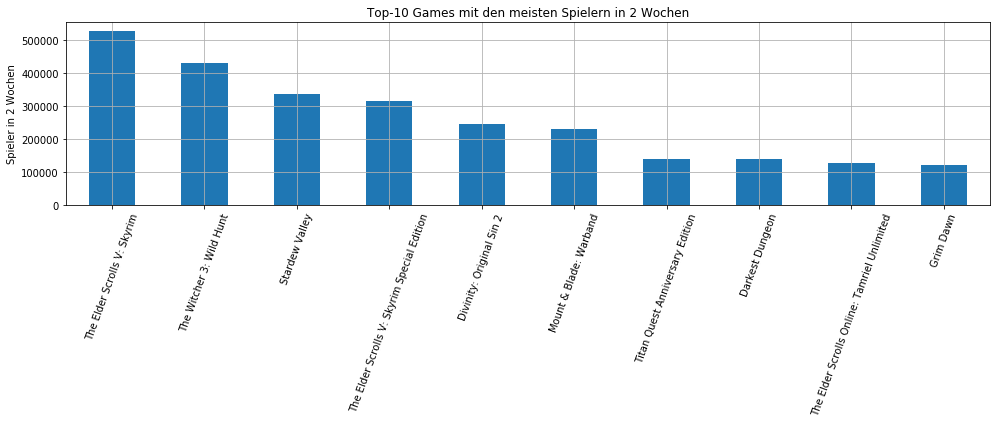

In [16]:
n = 10
df_plot = df.dropna().groupby('name').agg({'players_2weeks':'mean'}).sort_values('players_2weeks', ascending=False)
df_plot.head(n).plot(kind='bar', title='Top-{} Games mit den meisten Spielern in 2 Wochen'.format(n), figsize=(14,6), legend=False, grid=True)
plt.xlabel('')
plt.ylabel('Spieler in 2 Wochen')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/13_Games_mit_den_meisten_Spieler_in_2_Wochen.pdf')

df_plot.head(100).to_csv('Tabellen/13_Games_mit_den_meisten_Spieler_in_2_Wochen.csv')

# Wie hat sich Skyrim entwickelt?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f22f08a5ef0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f22f0be9240>], dtype=object)

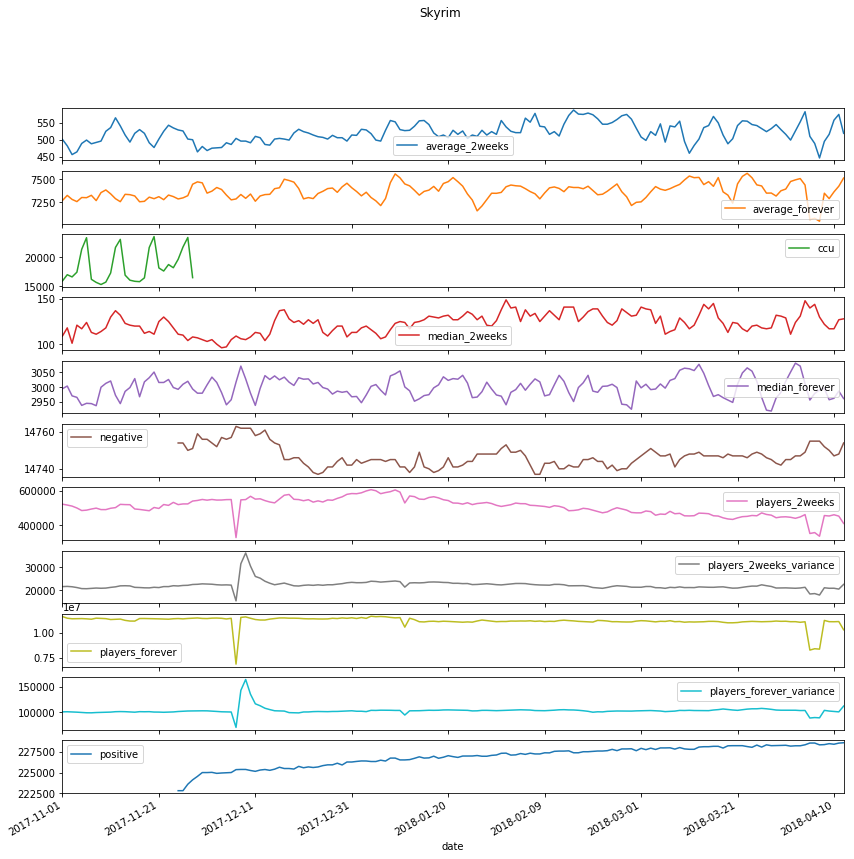

In [17]:
df_sky = df[df['name']=='The Elder Scrolls V: Skyrim']
df_sky.drop(['appid', 'owners', 'owners_variance', 'price', 'score_rank', 'userscore'], axis=1).plot(subplots=True, figsize=(14,14), title='Skyrim')

# Spieler über die Zeit

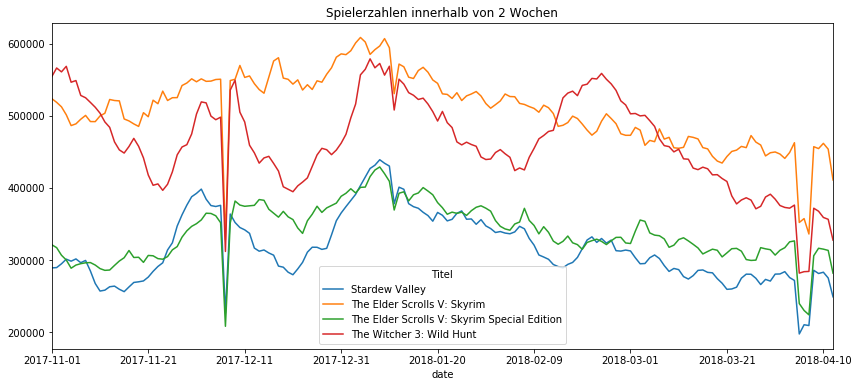

In [18]:
df_plot = df[df['name'].isin(['The Elder Scrolls V: Skyrim', 'The Witcher 3: Wild Hunt', 'Stardew Valley', 'The Elder Scrolls V: Skyrim Special Edition'])][['players_2weeks', 'name']].reset_index().rename(columns={'name':'Titel'}).pivot(index='date', columns='Titel', values='players_2weeks')
df_plot.rolling(1, center=True).mean().plot(figsize=(14,6), title='Spielerzahlen innerhalb von 2 Wochen')

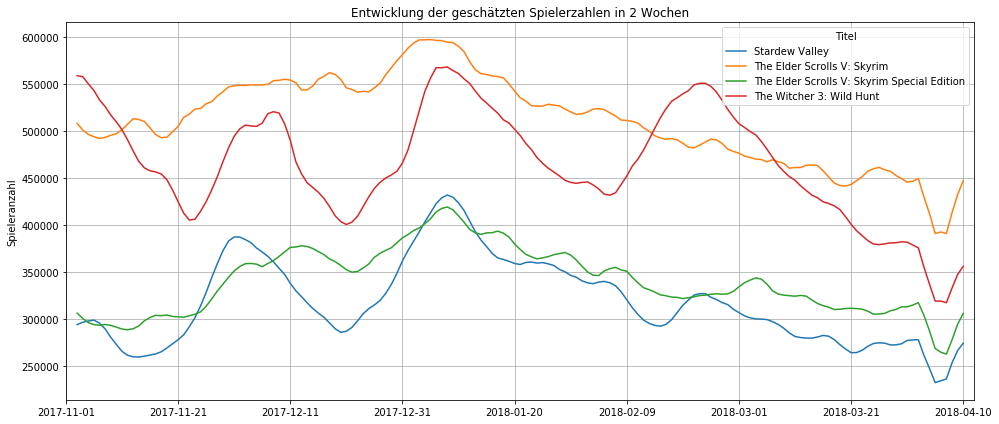

In [19]:
for loc in [36, 71]:
    for column in df_plot.columns:
        mean = (df_plot.iloc[loc-1][column] + df_plot.iloc[loc+1][column]) / 2
        df_plot.iloc[loc][column] = mean

df_plot.rolling(5, center=True).mean().plot(figsize=(14,6), title='Entwicklung der geschätzten Spielerzahlen in 2 Wochen', grid=True)
plt.xlabel('')
plt.ylabel('Spieleranzahl')
plt.tight_layout()
plt.savefig('Grafiken/14_Entwicklung_der_Spielerzahlen_einzelner_Games.pdf')